<a href="https://colab.research.google.com/github/aobd1356/Homework/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##HW03 Data Analysis
####標題:飛機飛行人數與時間關係

##摘要
#####本報告基於 seaborn 提供的 flights 資料集，想要收集哪一個月分出國人數最多，哪一個月分出國人數最少，並比較近幾年出國人數是增加還是減少

##引言
###背景
#####大學快畢業了，大家都想出國來個畢業旅行，所以想透過這則報告來了解哪時候出國人數最多，並避免人潮。
###目的
#####躲過人數最多的時期，以免人潮過多影響出國心情。
###待答問題
#####1.出國人數與月份之間的關係
#####2.出國人數與年份的關係
#####3.哪一年哪一月出國人數最多
#####4.哪一年出國人數成長幅度最低

##方法
###數據來源
#####本研究使用seaborn內建的flights數據集，該數據集包含出國人數，月份及年份。
###分析工具
#####Python（數據處理與分析）
#####Pandas（數據清理與統計分析）
#####Matplotlib / Seaborn（數據視覺化）
###數據處理
#####載入 tips 數據集並檢視數據概況。
#####探索性數據分析（EDA）以了解數據分佈與異常值。
#####繪製散點圖、長條圖，分析關鍵變數之間的關係。

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 載入數據集
flights = sns.load_dataset("flights")

# 顯示數據的前五筆
print(flights)

# 顯示數據基本資訊
flights.info()

     year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


##結果與分析
###出國人數與月份之間的關係
#####我們使用長條圖來觀察出國人數與月份之間的關係。

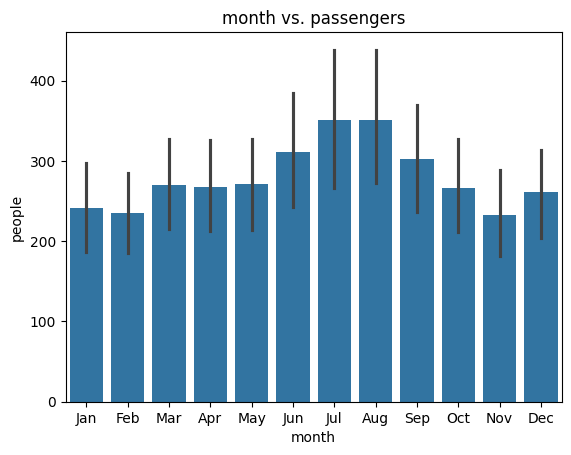

In [13]:
sns.barplot(x="month", y="passengers", data=flights)
plt.title("month vs. passengers")
plt.xlabel("month")
plt.ylabel("people")
plt.show()

###出國人數與年份的關係
#####我們統計各年的飛行人數，並使用長條圖呈現。

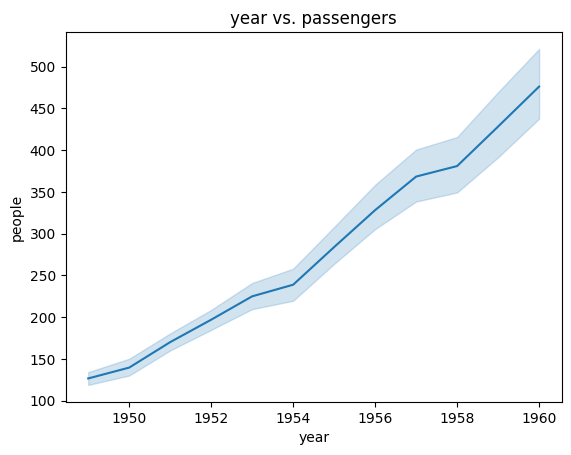

In [16]:
sns.lineplot(x="year", y="passengers", data=flights)
plt.title("year vs. passengers")
plt.xlabel("year")
plt.ylabel("people")
plt.show()

###哪一年哪一月出國人數最多
#####我們比較年與月與出國人數的關係，透過群組長條圖顯示。

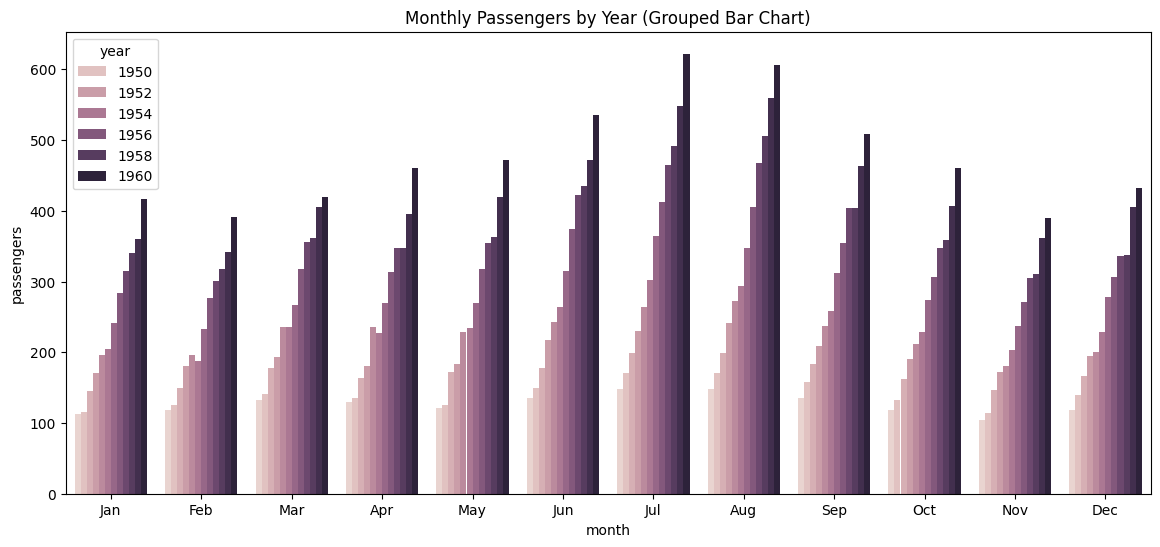

In [15]:
plt.figure(figsize=(14, 6))
sns.barplot(x="month", y="passengers", hue="year", data=flights)
plt.title("Monthly Passengers by Year (Grouped Bar Chart)")
plt.show()

###哪一年出國人數成長幅度最低
#####我們透過長條圖了解哪一年出國人數成長幅度最低

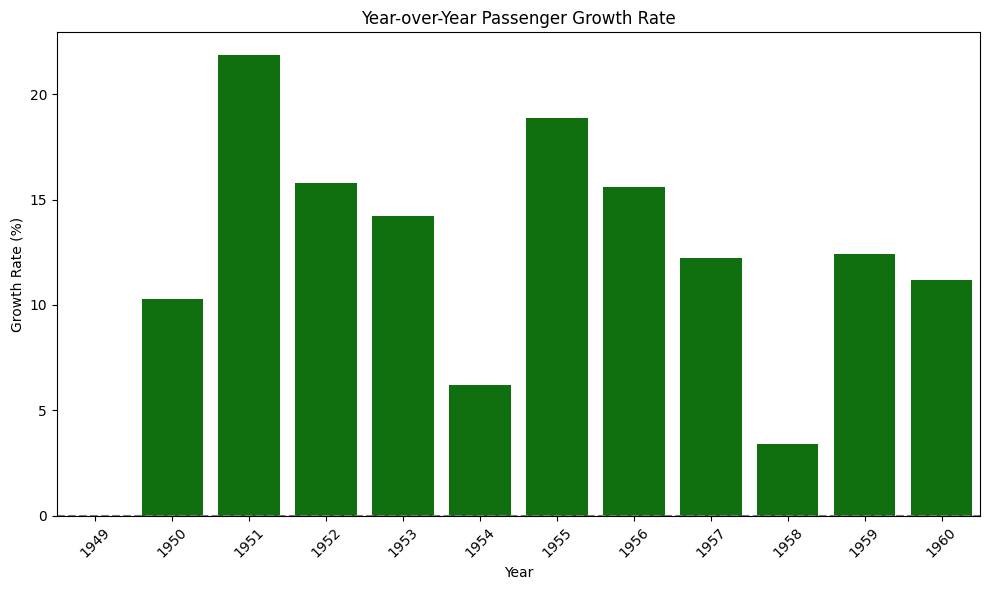

In [18]:
yearly_passengers = flights.groupby("year")["passengers"].sum().reset_index()

yearly_passengers["growth"] = yearly_passengers["passengers"].diff()  # 人數變化
yearly_passengers["growth_rate"] = yearly_passengers["passengers"].pct_change() * 100  # 百分比成長


plt.figure(figsize=(10, 6))
sns.barplot(x="year", y="growth_rate", data=yearly_passengers, color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Year-over-Year Passenger Growth Rate")
plt.ylabel("Growth Rate (%)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###分析結果
#####分析結果顯示，從1950年到1960年，出國人數有漸增的趨勢，而出國時間主要集中於7月，而在1957到1958年之間可能發生甚麼事，導致成長幅度較緩

##結論與建議
###結論
#####出國人數有越來越高的趨勢
#####成長幅度最高的是在1950到1951年間
###建議
#####雖然資料過於久遠，但出國旅遊時間可以避開這段時間，估計出國人數過多是因為暑假人特別多